## I. PROBLEM STATEMENT

Define and Explain the regression problem you want to solve. (Min of 100, Max of 300 Words)

(5 Points)

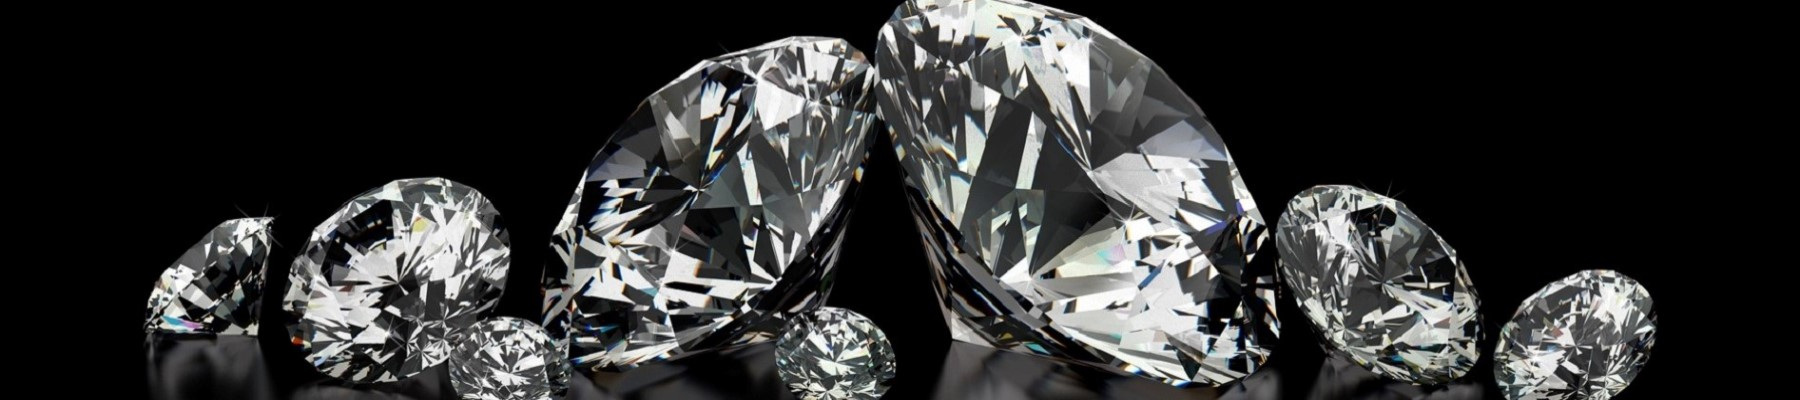
If you're shopping for an engagement ring, you need to know about the carat weight - the measurement of how much a diamond weighs. Carat weight is important because it helps determine a diamond's price and reflects it rarity. The program targets to predict the carat of the diamond depends on the features.

## II. DATASET DESCRIPTION

Look for public datasets or use your approved proposal's dataset. Define and Explain the dataset you will use for regression problem you want to solve. Include the link of where the public dataset downloaded (Min of 100, Max of 300 Words)

(5 Points)

This classic dataset contains the following attributes of almost 54,000 diamonds:

`price (US dollars)`, `carat`, `cut`, `color`, `clarity`, `x (length in mm)`, `y (width in mm)`, `z (depth in mm)`

Link for the dataset: [Diamonds Dataset](https://www.kaggle.com/datasets/shivam2503/diamonds?fbclid=IwAR3NLISSmolfTOMzh9ZZofftiV21Wd4YPMOlxj0ZIBIpzQdGGeLh_G_21r0)

## III. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Read the data

(5 Points)

In [ ]:
import pandas as pd
import numpy as np

data_diamond = pd.read_csv('diamonds.csv')

### 2. Get an overview of the dataset:

(5 Points)

In [ ]:
data_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### 3. Print the first five and last five rows of the dataset

(5 Points)

In [ ]:
data_diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_diamond.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### 4. Find the summary statistics of the dataset

(5 Points)

In [ ]:
data_diamond.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


### 5. Find the total count and total percentage of missing values in each column of the DataFrame and display them for columns having at least one null value, in descending order of missing percentages.

(5 Points)

In [ ]:
mask = data_diamond.isnull()
total = mask.sum()
percent = 100*mask.mean()

missing_data = pd.concat([total, percent], axis=1,join='outer',
                         keys=['count_missing', 'perc_missing'])
missing_data.sort_values(by='perc_missing', ascending=False, inplace=True)
missing_data

,count_missing,perc_missing
Unnamed: 0,0,0.0
carat,0,0.0
cut,0,0.0
color,0,0.0
clarity,0,0.0
depth,0,0.0
table,0,0.0
price,0,0.0
x,0,0.0
y,0,0.0


### 6. Plot the nullity matrix and nullity correlation heatmap.

(5 Points)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:305: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


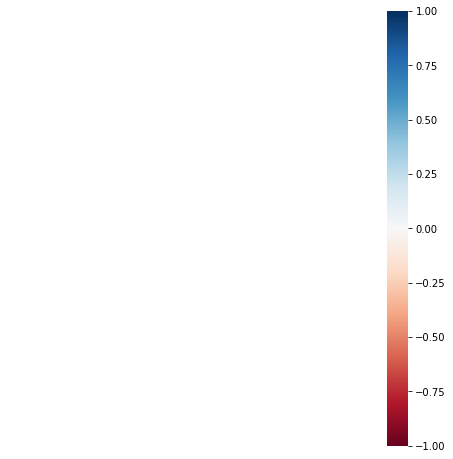

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

nullable_columns = data_diamond.columns[mask.any()].tolist()
# msno.matrix(data_diamond[nullable_columns].sample(500))
plt.show()

msno.heatmap(data_diamond[nullable_columns], figsize=(8,8))
plt.show()

I commented out the msno.matrix in line 5 because the dataset has no missing value which results to an error of the program.

### 7. Delete the columns having more than 80% of values missing.

(5 Points)

Converting categorical value in numerical value and Plotting using heatmap to locate correlations of the Features.

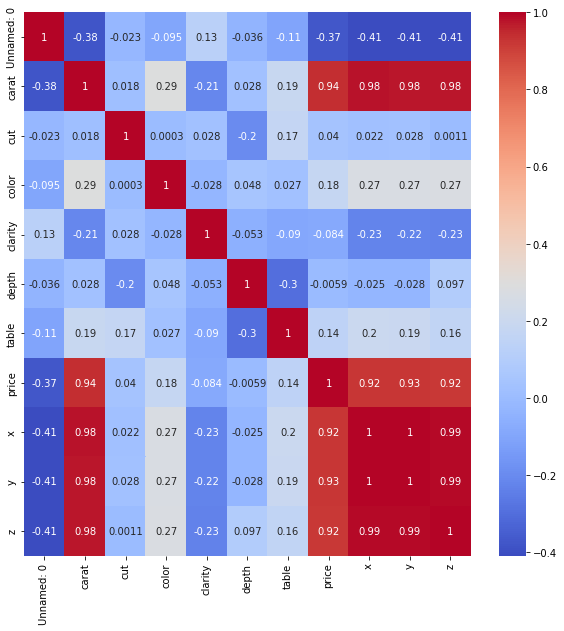

In [ ]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

df_diamond = data_diamond.apply(LabelEncoder().fit_transform)

plt.figure(figsize=(10,10))
sns.heatmap(df_diamond.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Deleting all features with weak correlations to the Carat (target)
data_drop = df_diamond.drop(['Unnamed: 0', 'cut', 'color', 'clarity', 'depth', 'table'], axis=1)

Checking the new head of the dataset

In [ ]:
data_drop.head()

,carat,price,x,y,z
0,3,0,20,26,24
1,1,0,14,12,12
2,3,1,30,35,12
3,9,2,45,51,44
4,11,3,59,63,56


### 8. Impute null values based from the Summary Statistics. Any statistical values can be used for imputation

(5 Points)

In [ ]:
## Insert code here: N/A

### 9. Export the Cleaned Dataset.

(5 Points)

In [ ]:
data_drop.to_csv("diamondForModel.csv", index=False)

## IV.  AI MODELLING - APPLIED REGRESSION ANALYSIS (ARA)

### 1. Import the required dependencies.

(5 Points)

In [ ]:
from sklearn.linear_model import LinearRegression

### 2. Read the cleaned data.

(5 Points)

In [ ]:
cleanedData_diamond = pd.read_csv('diamondForModel.csv')
cleanedData_diamond.head()

,carat,price,x,y,z
0,3,0,20,26,24
1,1,0,14,12,12
2,3,1,30,35,12
3,9,2,45,51,44
4,11,3,59,63,56


### 3. Construct a multiple linear regression model.

(15 Points)

In [ ]:
target = ['carat']
features = cleanedData_diamond.columns.tolist()
del features[features.index('carat')]
features

['price', 'x', 'y', 'z']

In [ ]:
model = LinearRegression()
model.fit(cleanedData_diamond[features], cleanedData_diamond[target].values.reshape((-1, 1)))

LinearRegression()

### 4. Compute the performance of the model in terms of the R-squared value. <font color=red>Target Score: 80% and Above </font>.

(20 Points)

In [ ]:
acc = model.score(cleanedData_diamond[features], cleanedData_diamond.carat.values.reshape((-1, 1)))
print(acc * 100)

96.77371210584093
